# Q3 Multi-layer CIFAR-10 Classifier

In [1]:
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

In [2]:
transformations  = transforms.Compose([transforms.Grayscale(), transforms.ToTensor(),])
trainData = datasets.cifar.CIFAR10('./', train=True, download=True, transform=transformations)
testData = datasets.cifar.CIFAR10('./', train=False, download=True, transform=transformations)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
trainDataLoader = DataLoader(trainData, batch_size=64, shuffle=True)
testDataLoader = DataLoader(testData, batch_size=64, shuffle=False)

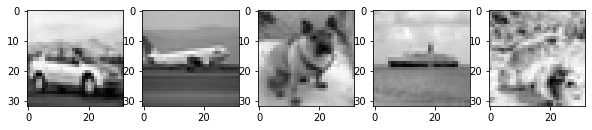

In [4]:
images, labels = iter(trainDataLoader).next()

plt.figure(figsize=(10, 6))
for index in np.arange(0, 5):
  plt.subplot(1, 5, index+1)
  plt.imshow(images[index].squeeze().numpy(),cmap=plt.cm.gray)

In [5]:
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.input = torch.nn.Linear(32*32, 256)
    self.hidden1 = torch.nn.Linear(256, 128)
    self.hidden2 = torch.nn.Linear(128, 64)
    self.hidden3 = torch.nn.Linear(64, 32)
    self.output = torch.nn.Linear(32, 10)

  def forward(self, x):
    x = x.view(-1, 32*32)
    x = self.input(x)
    x = self.hidden1(x)
    x = self.hidden2(x)
    x = self.hidden3(x)
    x = self.output(x)
    return x

In [6]:
model = Network().cuda()
Loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [7]:
train_loss_history = []
test_loss_history = []
epochs = 50

for epoch in range(epochs):
  train_loss = 0.0
  test_loss = 0.0

  for idx, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    predicted_output = model(images)
    fit = Loss(predicted_output,labels)
    fit.backward()
    optimizer.step()
    train_loss += fit.item()

  for idx, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = model(images)
      fit = Loss(predicted_output,labels)
      test_loss += fit.item()

  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  print('Epoch %s, Train loss %s, Test loss %s'%(epoch+1, train_loss, test_loss))

Epoch 1, Train loss 2.270371614514714, Test loss 2.2083689862755453
Epoch 2, Train loss 2.1649547261960063, Test loss 2.134809463646761
Epoch 3, Train loss 2.110139509143732, Test loss 2.106396438209874
Epoch 4, Train loss 2.0794539100983562, Test loss 2.080070251112531
Epoch 5, Train loss 2.065835953216114, Test loss 2.065304956618388
Epoch 6, Train loss 2.055687601456557, Test loss 2.0643994079273975
Epoch 7, Train loss 2.0475597707816706, Test loss 2.050188177710126
Epoch 8, Train loss 2.0413332549507355, Test loss 2.053552736901933
Epoch 9, Train loss 2.0357137968778, Test loss 2.036885335946539
Epoch 10, Train loss 2.0316555908573863, Test loss 2.0582856759903536
Epoch 11, Train loss 2.027174170059926, Test loss 2.041135093968385
Epoch 12, Train loss 2.0230181119631014, Test loss 2.039115027257591
Epoch 13, Train loss 2.0203627033916582, Test loss 2.024886895137228
Epoch 14, Train loss 2.0179165165747524, Test loss 2.0197119849502663
Epoch 15, Train loss 2.0156145964742014, Test l

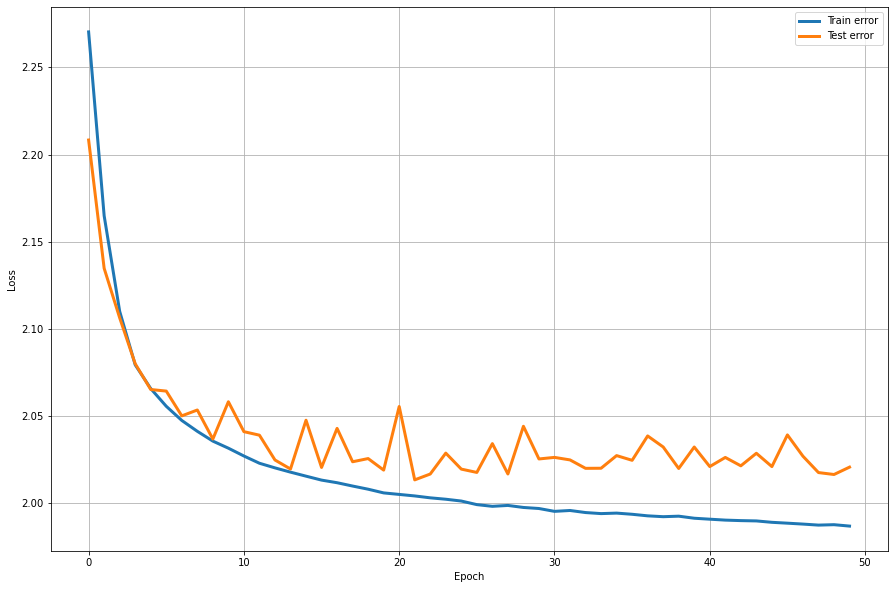

In [8]:
plt.figure(figsize=(15, 10))
plt.plot(range(epochs), train_loss_history, '-', linewidth=3, label='Train error')
plt.plot(range(epochs), test_loss_history, '-', linewidth=3, label='Test error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

In [9]:
n_correct = 0
predicted = []
for data in testDataLoader:
  images, labels = data
  images = images.cuda()
  labels = labels.cuda()
  with torch.no_grad():
    outputs = model(images)
    (_, pred) = torch.max(outputs, 1)
    predicted.append(pred)
    n_correct += (pred == labels).sum().item()

accuracy = ((n_correct * 1.0) / len(testData)) * 100
print('Accuracy on Training Data: ', accuracy)

Accuracy on Training Data:  29.880000000000003


# End of Notebook